## Table of Contents
##### Introduction
##### Problem Statement
##### Importing the dependencies
##### Data Loading
##### Understanding the dataset
##### Data Cleaning
##### Questions
1. How many orders for each country
2. Which are the top 5 countries with maximum orders
3. What are the top 5 items with highest number of orders 
4. Who are the top 5 buyers who spent the most money
5. What were the sales for each month


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### Introduction
This dataset contains transaction data with customers in different countries purchasing different items 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Datasets/Online_Retail.csv', encoding= 'unicode_escape')
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [ ]:
data.shape

(541909, 8)

In [ ]:
data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


# Data Cleaning

### Drop rows having description as Null

In [ ]:
data.dropna(subset=['Description'], inplace=True)

In [ ]:
# Description with NaN values dropped
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 540455 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    540455 non-null  object 
 1   StockCode    540455 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     540455 non-null  int64  
 4   InvoiceDate  540455 non-null  object 
 5   UnitPrice    540455 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      540455 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 37.1+ MB


In [ ]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,540455.000000,540455.000000,406829.000000
mean,9.603129,4.623519,15287.690570
std,218.007598,96.889628,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


From the table it is seen that that quantity has some negative values which is not possible so drop the rows with quantities having negative vaues

From the above table it is seen that some price values are negative 
So, changing negative price to zero

In [ ]:
data = data[data['Quantity']>0]

In [ ]:
data.loc[data.UnitPrice<0, 'UnitPrice'] = 0

In [ ]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,530693.000000,530693.000000,397924.000000
mean,10.605819,3.903288,15294.315171
std,156.637853,35.895980,1713.169877
min,1.000000,0.000000,12346.000000
25%,1.000000,1.250000,13969.000000
50%,3.000000,2.080000,15159.000000
75%,10.000000,4.130000,16795.000000
max,80995.000000,13541.330000,18287.000000


Inserting a column 'AmountSpent' which will contain total amount spent in an order

In [ ]:
data['AmountSpent'] = data.Quantity * data.UnitPrice
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,AmountSpent
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34


Changing invoice date format to timestamp


In [ ]:
data.InvoiceDate = pd.to_datetime(data.InvoiceDate, format='%d-%m-%Y %H:%M')

In [ ]:
data.head(1)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,AmountSpent
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.3


In [ ]:
data.Description = data.Description.str.lower()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 530693 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    530693 non-null  object        
 1   StockCode    530693 non-null  object        
 2   Description  530693 non-null  object        
 3   Quantity     530693 non-null  int64         
 4   InvoiceDate  530693 non-null  datetime64[ns]
 5   UnitPrice    530693 non-null  float64       
 6   CustomerID   397924 non-null  float64       
 7   Country      530693 non-null  object        
 8   AmountSpent  530693 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 40.5+ MB


CustomerID has many NULL values so dropping those rows

In [ ]:
data.dropna(subset=['CustomerID'], inplace=True)

In [ ]:
data.CustomerID = data.CustomerID.astype('int64')

Insert 2 new column 'Month', 'Year'

In [ ]:
data['Month'] = data.InvoiceDate.dt.month
data['Year'] = data.InvoiceDate.dt.year
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,AmountSpent,Month,Year
0,536365,85123A,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,12,2010
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,12,2010
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,12,2010
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,12,2010
4,536365,84029E,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,12,2010


# Exploratory Data Analysis

## How many orders for each country

In [ ]:
data.Country.value_counts()

United Kingdom          354345
Germany                   9042
France                    8342
EIRE                      7238
Spain                     2485
Netherlands               2363
Belgium                   2031
Switzerland               1842
Portugal                  1462
Australia                 1185
Norway                    1072
Italy                      758
Channel Islands            748
Finland                    685
Cyprus                     614
Sweden                     451
Austria                    398
Denmark                    380
Poland                     330
Japan                      321
Israel                     248
Unspecified                244
Singapore                  222
Iceland                    182
USA                        179
Canada                     151
Greece                     145
Malta                      112
United Arab Emirates        68
European Community          60
RSA                         58
Lebanon                     45
Lithuani

## Top 5 countries with maximum orders

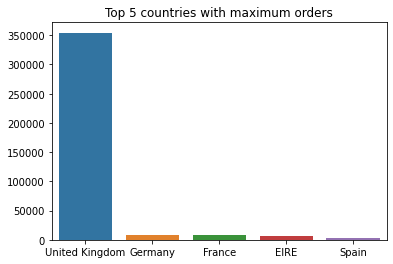

In [ ]:
top5 = data.Country.value_counts()[:5]
sns.barplot(x=top5.index, y=top5.values)
plt.title('Top 5 countries with maximum orders')
plt.show()

## Top 5 customers with most number of orders 

In [ ]:
top_customer = data.groupby(by=['CustomerID', 'Country'])['InvoiceNo'].count().sort_values(ascending=False).head()
top_customer

CustomerID  Country       
17841       United Kingdom    7847
14911       EIRE              5677
14096       United Kingdom    5111
12748       United Kingdom    4596
14606       United Kingdom    2700
Name: InvoiceNo, dtype: int64

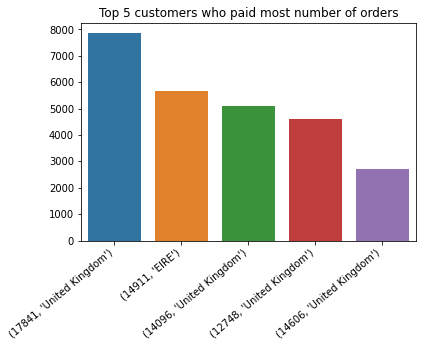

In [ ]:
axc = sns.barplot(x=top_customer.index.to_numpy(), y=top_customer.values)
axc.set_xticklabels(axc.get_xticklabels(), rotation=40, ha='right')
plt.title('Top 5 customers who paid most number of orders')
plt.show()

## Top 5 items with highest number of orders 

In [ ]:
top_desc = data.Description.value_counts().sort_values(ascending=False)[:5]
top_desc

white hanging heart t-light holder    2028
regency cakestand 3 tier              1724
jumbo bag red retrospot               1618
assorted colour bird ornament         1408
party bunting                         1397
Name: Description, dtype: int64

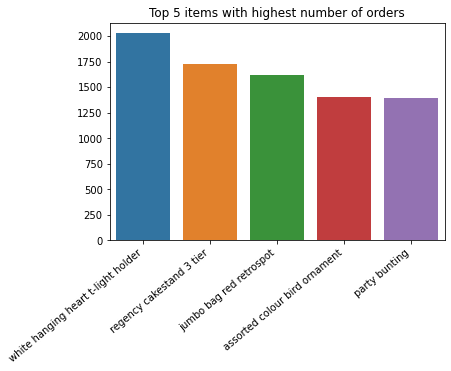

In [ ]:
ax = sns.barplot(x=top_desc.index, y=top_desc.values)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right") 
plt.title('Top 5 items with highest number of orders')
plt.show()

## Top 5 buyers who spent the most money

In [ ]:
top_buyers = data.groupby(by=['CustomerID', 'Country'])['AmountSpent'].sum().sort_values(ascending=False).head()
top_buyers

CustomerID  Country       
14646       Netherlands       280206.02
18102       United Kingdom    259657.30
17450       United Kingdom    194550.79
16446       United Kingdom    168472.50
14911       EIRE              143825.06
Name: AmountSpent, dtype: float64

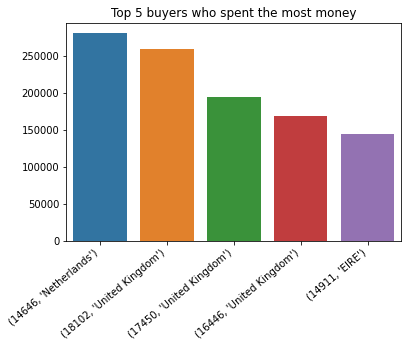

In [ ]:
ax2 = sns.barplot(x=top_buyers.index.to_numpy(), y=top_buyers.values)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=40, ha="right")
plt.title('Top 5 buyers who spent the most money')
plt.show()

## Sales for each month

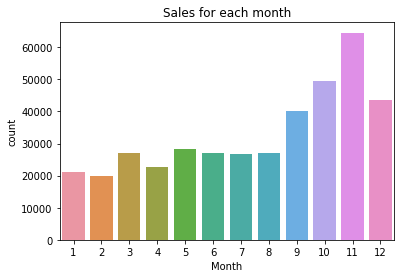

In [ ]:
sns.countplot(data['Month'])
plt.title('Sales for each month')
plt.show()

From the above plot we see that maximum orders were placed in November.

# Conclusion
1. The country with highest number of orders is United Kingdoms
2. The customer with highest number of orders is from United Kingdoms
3. Maximum number of orders were placed for hanging white heart t-light holder
4. Buyer who spent the most money on orders was from Netherland
5. Maximum orders were placed in the month of November